# Sensor Placement Optimization in a Lake Environment

This Python script aims to optimize the placement of sensors within a lake environment to maximize coverage while minimizing the distance between sensors. The optimization is performed using a genetic algorithm.

## Overview

The script utilizes a genetic algorithm approach to find the best locations for a set number of sensors within a given lake area. The key components include:

- **Lake Representation**: The lake environment is represented as a matrix where water is denoted by `1` and land by `0`.
- **Sensor Size**: Defined as 4x4, the sensor placement adheres to this size constraint.
- **Fitness Function**: Evaluates the coverage of sensors while penalizing distances between them to find an optimal balance.
- **Genetic Algorithm**: Utilizes populations, fitness evaluation, selection, crossover, and mutation to evolve sensor positions across generations.

## Usage

### Requirements

- Python 3.x
- Libraries: NumPy, Matplotlib

### Execution

1. Ensure Python and required libraries are installed.
2. Run the script in a Python environment.
3. The script will output the best coverage achieved and the positions where sensors are placed within the lake.
4. A visualization will be displayed showing the lake, sensor placements (numbered in red), and covered areas (light blue).

### Parameters

- `population_size`: Number of individuals in each generation.
- `generations`: Number of generations for the genetic algorithm.
- `num_sensors`: Number of sensors to be placed within the lake.

## Visualization

The script generates a visual representation of the lake environment, displaying sensor positions and areas covered by each sensor.

## Authors

This project is maintained by Manuel Cruces and Fabian Godoy, civil engineering and telematics engineering students.


In [2]:
import numpy as np

# Matriz del Lago de Peñuelas, 0 = tierra, 1 = agua.
matriz = np.array([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]
)

# Expansión al triple del tamaño
expanded_matriz = np.kron(matriz, np.ones((3, 3), dtype=int))

# Imprimir la matriz expandida
print(expanded_matriz)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Mejor cobertura y distribución: 83.77004445688105
Sensores colocados en: [(18, 27), (37, 3), (36, 44), (31, 12)]


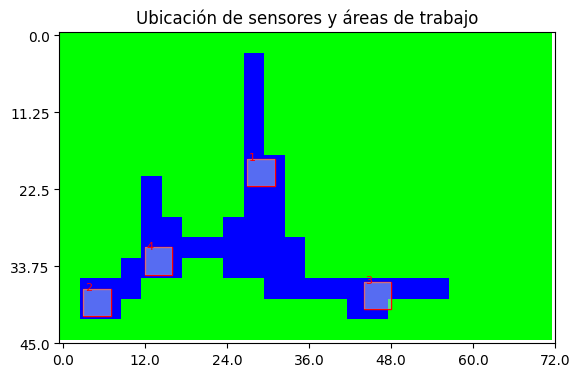

In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Tu matriz del lago (lake) y sus dimensiones
# Se asume que 'expanded_matriz' ya está definido previamente
lake = expanded_matriz
lake_height, lake_width = lake.shape

# Tamaño del sensor y del lago
sensor_size = 4

# Restricción para asegurar que los sensores estén dentro del lago
def dentro_del_lago(sensor_pos):
    x, y = divmod(sensor_pos, lake_width)
    # Verificar si el sensor está dentro del lago y si la posición es agua (valor 1 en lake)
    for i in range(sensor_size):
        for j in range(sensor_size):
            if not (0 <= x + i < lake_height and 0 <= y + j < lake_width and lake[x + i, y + j] == 1):
                return False
    return True

# Función para calcular la superficie del lago cubierta por un sensor en una posición dada
def calcular_superficie_cubierta(sensor_pos, covered):
    x, y = divmod(sensor_pos, lake_width)
    for i in range(sensor_size):
        for j in range(sensor_size):
            if 0 <= x + i < lake_height and 0 <= y + j < lake_width and lake[x + i, y + j] == 1:
                covered.add((x + i, y + j))

# Función de aptitud (fitness) para el algoritmo genético
def fitness_function_with_distance(individual):
    covered_area = set()
    total_distance = 0  # Inicializar la suma de distancias entre sensores
    for sensor in individual:
        sensor_covered = set()
        calcular_superficie_cubierta(sensor, sensor_covered)
        sensor_covered -= covered_area  # Quitar áreas ya cubiertas
        covered_area |= sensor_covered  # Agregar nuevas áreas cubiertas

    # Calcular la distancia total entre sensores en el individuo
    for i, sensor1 in enumerate(individual):
        for j, sensor2 in enumerate(individual):
            if i != j:
                x1, y1 = divmod(sensor1, lake_width)
                x2, y2 = divmod(sensor2, lake_width)
                distance = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5  # Distancia euclidiana
                total_distance += distance

    return len(covered_area) + 0.062 * total_distance  # se suma un factor de la distancia penalizada

# Configuración del algoritmo genético
population_size = 100
generations = 200
num_sensors = 4

population = []
while len(population) < population_size:
    new_individual = []
    while len(new_individual) < num_sensors:
        sensor_pos = random.randint(0, lake_height * lake_width - 1)
        x, y = divmod(sensor_pos, lake_width)
        if lake[x, y] == 1 and dentro_del_lago(sensor_pos):
            new_individual.append(sensor_pos)
    population.append(new_individual)

for generation in range(generations):
    fitness_scores = [fitness_function_with_distance(individual) for individual in population]
    selected_indices = np.argsort(fitness_scores)[-population_size // 2:]

    new_population = [population[i] for i in selected_indices]
    while len(new_population) < population_size:
        parent1, parent2 = random.choices(new_population, k=2)
        crossover_point = random.randint(1, num_sensors - 1)
        child = parent1[:crossover_point] + parent2[crossover_point:]
        mutation_prob = 0.1
        if random.random() < mutation_prob:
            mutation_point = random.randint(0, num_sensors - 1)
            child[mutation_point] = random.randint(0, lake_height * lake_width - 1)
        new_population.append(child)

    population = new_population

best_individual = max(population, key=fitness_function_with_distance)
best_coverage = fitness_function_with_distance(best_individual)
print("Mejor cobertura y distribución:", best_coverage)
print("Sensores colocados en:", [divmod(sensor, lake_width) for sensor in best_individual])

# Visualización del lago con sensores y áreas de trabajo
lake_colors = np.zeros((lake_height, lake_width, 3))  # Matriz para representar los colores RGB

# Asignar valores de colores RGB a las áreas del lago
for i in range(lake_height):
    for j in range(lake_width):
        if lake[i, j] == 0:
            lake_colors[i, j] = [0, 1, 0]  # Tierra (verde)
        else:
            lake_colors[i, j] = [0, 0, 1]  # Agua (azul)

fig, ax = plt.subplots()
ax.imshow(lake_colors)

sensor_positions = [divmod(sensor, lake_width) for sensor in best_individual]
for idx, pos in enumerate(sensor_positions, start=1):
    sensor_x, sensor_y = pos
    rect = plt.Rectangle((sensor_y, sensor_x), sensor_size, sensor_size, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.text(sensor_y + 0.2, sensor_x + 0.2, str(idx), color='red', fontsize=8)  # Añadir el número del sensor

    covered_area = set()
    calcular_superficie_cubierta(sensor_x * lake_width + sensor_y, covered_area)
    for coord in covered_area:
        x, y = coord
        rect = plt.Rectangle((y, x), 1, 1, edgecolor='none', facecolor='lightblue', alpha=0.5)
        ax.add_patch(rect)

# Ajustar la escala de los ejes x e y
x_ticks = np.linspace(0, lake_width, num=7)  # Etiquetas para el eje x
y_ticks = np.linspace(0, lake_height, num=5)  # Etiquetas para el eje y

# Mostrar las etiquetas en los ejes x e y
plt.xticks(np.arange(0, lake_width + 1, lake_width / 6), x_ticks)
plt.yticks(np.arange(0, lake_height + 1, lake_height / 4), y_ticks)

plt.title('Ubicación de sensores y áreas de trabajo')

plt.show()
